# EDA (Exploratory Data Analysis)

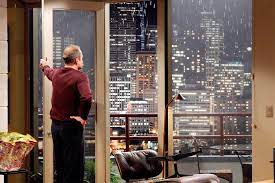

This is my first Data Analysis Project

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# First Project - Data Analysis

This project is centered around exploratory data
analysis techniques and presentation of results to a client.

**Once you start working please follow the [workflow](workflow.md) to help you achieve the tasks successfully!**

# The data

- You will use the King County Housing Data: This dataset contains information about home sales in King County (USA).
- You will find the data in the eda schema of our database. You can access it via DBeaver. Please save the csv file in the data folder where it will not be uploaded to github.
- Please explore the dataset in DBeaver and come up with a Join for the 2 tables.
- The description of the column names can be found in the `column_names.md` file.
- The column names may NOT be clear at times:

  _In the real world we will run into similar challenges. We would then go ask our business clients for more information. In this case, let us assume our business client who would give us information, left the company. Meaning we would have to identify and look up what each column names might actually mean. (google is your friend ;) )_

**Data is fetched and saved in data/eda.csv**



# Column Names and descriptions for King County Data Set

- **id** - unique identified for a house
- **dateDate** - house was sold
- **pricePrice** - is prediction target
- **bedroomsNumber** - # of bedrooms
- **bathroomsNumber** - # of bathrooms
- **sqft_livingsquare** - footage of the home
- **sqft_lotsquare** - footage of the lot
- **floorsTotal** - floors (levels) in house
- **waterfront** - House which has a view to a waterfront
- **view** - quality of view
- **condition** - How good the condition is ( Overall )
- **grade** - overall grade given to the housing unit, based on King County grading system
- **sqft_above** - square footage of house apart from basement
- **sqft_basement** - square footage of the basement
- **yr_built** - Built Year
- **yr_renovated** - Year when house was renovated
- **zipcode** - zip
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

-> these are the available data for now. I am allowed to add data later if i find sth useful for my case.

# The Deliverables

1. A **well documented Jupyter Notebook** (see [here](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python) for an example) containing the code you've written for this project and comments explaining it. This work will need to be pushed to your GitHub repository in order to submit your project. Do not push all the analysis... just the analysis that is relevant! You can start with the [starter notebook](EDA.ipynb).
2. An **updated and organized README.md** file in the GitHub repository that describes the contents of the repository. This file should be the source of information for navigating through the repository.
3. A **short Keynote/PowerPoint/Google Slides/Jupyter slides presentation** giving a **high-level overview** of your methodology and recommendations for **non-technical clients**. The duration of the presentation should be **10 minutes**, then the discussion will continue for 5 minutes. Also put your slides (delivered as a PDF export) on Github to get a well-rounded project. **Do not present using your jupyter notebook!**
4. _Optional_ - A Python script for processing and cleaning your data, here feel free to write clean code, using functions and docstrings. Even more optional you can also do unit tests. If you do this part, you may also update your EDA notebook to make use of these functions. See [optional](optional) folder for example.

# My Chosen Client

**Nicole Johnson;	Buyer;	Lively, central neighborhood, middle price range, right timing (within a year)**



# My Hypotheses for Client Nicole Johnson

Based on Nicole's requirements (lively, central neighborhood, middle price range, within a year), I formulate the following testable hypotheses:

---

## Hypothesis 1: Central Location Price Premium & Middle-Range Opportunities

Houses in central neighborhoods (proximity to Seattle downtown: lat ~47.6, long ~-122.3) are 20-40% more expensive than peripheral areas. However, within the **middle price range** (defined as 25th-75th percentile of all house prices), there exist affordable options in central zipcodes that meet Nicole's budget requirements.

**Key Questions:**
- What defines "middle price range" in dollar terms?
- Which central zipcodes offer homes within this range?

---

## Hypothesis 2: Seasonal Price Variation & Optimal Timing

House prices show **seasonal variation** throughout the year, with lower prices during **winter months** (Nov-Feb) compared to **spring/summer peaks** (Apr-Aug). This creates an **optimal buying window** in winter where Nicole can maximize value and negotiate better deals within her timeframe of one year.

**Key Questions:**
- What is the average price difference between seasons?
- Are middle-range houses more affected by seasonal trends?

---

## Hypothesis 3: Hidden Gem Neighborhoods - Value-for-Money Discovery

There exist **a few (2-4) "undervalued" zipcodes** within 10km of Downtown Seattle where houses with comparable features (grade 7-8, condition ≥3, sqft_living 1500-2500) are **10-20% cheaper** than premium central zipcodes (e.g., 98101, 98102, 98103), while maintaining similar **neighborhood quality**. 

**Neighborhood quality measured by:**
- `sqft_living15` ≥ 1800 sqft (indicating established, quality neighborhood)
- Average `yr_built` > 1960 (not too old)
- Renovation rate > 15% (active, improving community)

**Expected outcome:** Identify specific zipcodes that offer Nicole the best value-for-money while meeting her "lively, central" requirements.

## Quantified Definitions for Analysis

### 1. Central Location (Dual Definition)
**A) Geographic (Distance-based):**
- **Downtown Seattle:** lat = 47.6062, long = -122.3321
- **Central:** Within 10km radius

**B) Neighborhood-based (Zipcodes):**
Nach eigener Recherche (Quelle: https://www.pnwresidences.com/zip-code/seattle/)
- **Premium Central:** 98101, 98102, 98103, 98104, 98109, 98121, 98122
- **Extended Central:** 98105, 98112, 98115, 98117, 98119, 98199

### 2. Middle Price Range
- **Definition:** 25th-75th percentile of house prices
- **Will be calculated:** After data loading

### 3. Lively Neighborhood
- **High transaction volume:** ≥ 50 sales per zipcode
- **Dense neighborhood:** `sqft_lot15` < 7500 sqft

### 4. Seasonal Timing
- **Winter (low prices):** Nov, Dec, Jan, Feb (months 11, 12, 1, 2)
- **Spring/Summer (high prices):** Apr, May, Jun, Jul, Aug (months 4-8)

### 5. Neighborhood Quality (for H3)
- **Established area:** `sqft_living15` ≥ 1800 sqft
- **Not too old:** avg `yr_built` > 1960
- **Active community:** Renovation rate > 15%

### First Data Overview

In [2]:
# LOAD DATA & FIRST OVERVIEW

# Load dataset
df = pd.read_csv('data/eda.csv')

# Basic info
print(f"Shape: {df.shape}")
#df.head(10)
df.tail(10)

Shape: (21597, 21)


,date,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21587,2014-08-25,507250.000,7852140040,3.000,2.500,2270.000,5536.000,2.000,NaN,0.000,...,8,2270.000,0.000,2003,0.000,98065,47.539,-121.881,2270.000,5731.000
21588,2015-01-26,429000.000,9834201367,3.000,2.000,1490.000,1126.000,3.000,0.000,0.000,...,8,1490.000,0.000,2014,0.000,98144,47.570,-122.288,1400.000,1230.000
21589,2014-10-14,610685.000,3448900210,4.000,2.500,2520.000,6023.000,2.000,0.000,NaN,...,9,2520.000,0.000,2014,0.000,98056,47.514,-122.167,2520.000,6023.000
21590,2015-03-26,1010000.000,7936000429,4.000,3.500,3510.000,7200.000,2.000,0.000,0.000,...,9,2600.000,910.000,2009,0.000,98136,47.554,-122.398,2050.000,6200.000
21591,2015-02-19,475000.000,2997800021,3.000,2.500,1310.000,1294.000,2.000,0.000,0.000,...,8,1180.000,130.000,2008,0.000,98116,47.577,-122.409,1330.000,1265.000
21592,2014-05-21,360000.000,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,...,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000
21593,2015-02-23,400000.000,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,...,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000
21594,2014-06-23,402101.000,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,...,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000
21595,2015-01-16,400000.000,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,...,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000
21596,2014-10-15,325000.000,1523300157,2.000,0.750,1020.000,1076.000,2.000,0.000,0.000,...,7,1020.000,0.000,2008,0.000,98144,47.594,-122.299,1020.000,1357.000


In [3]:
# Check columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   id             21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# Missing values
missing = df.isnull().sum()
print(f"Missing values:\n{missing[missing > 0]}")

Missing values:
waterfront       2391
view               63
sqft_basement     452
yr_renovated     3848
dtype: int64


In [5]:
# Columns statistics

df.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


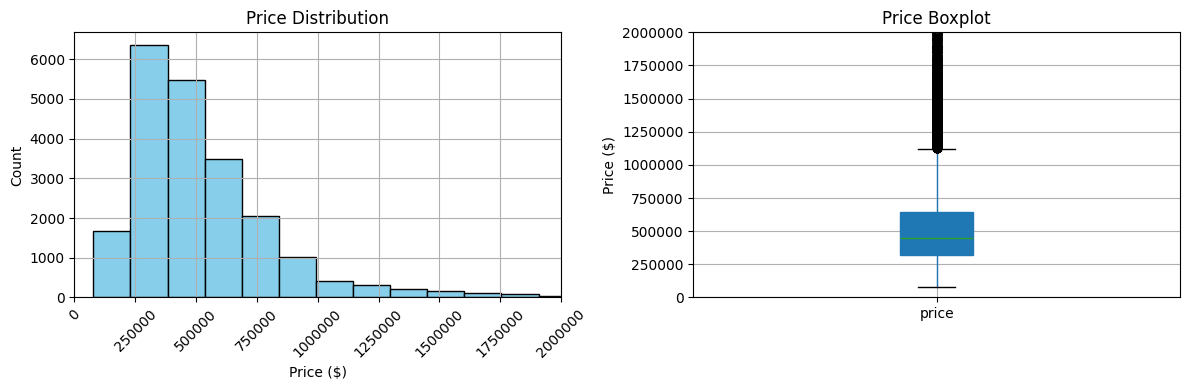

Price range: $78,000 - $7,700,000
Median: $450,000
Mean: $540,297
NICOLE'S MIDDLE PRICE RANGE (Q1-Q3): $322,000 - $645,000
→ 10832 houses available (50.2%)
Outliers (>$2M): 198 houses
Houses ≤$2M: 21399 houses (99.1% of dataset)


In [7]:
#  VISUAL CHECKS 

# Price distribution
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
df['price'].hist(bins=50, edgecolor='black', color='skyblue')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.ticklabel_format(style='plain', axis='x')  # No scientific notation
plt.xticks(rotation=45)
plt.xlim(0, 2000000)  # Focus on realistic range (98% of data)

# Boxplot (without extreme outliers for better view)
plt.subplot(1, 2, 2)
df.boxplot(column='price', vert=True, patch_artist=True)
plt.ylabel('Price ($)')
plt.title('Price Boxplot')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 2000000)  # Focus on main range (exclude extreme outliers)

plt.tight_layout()
plt.show()

# Key statistics
print(f"Price range: ${df['price'].min():,.0f} - ${df['price'].max():,.0f}")
print(f"Median: ${df['price'].median():,.0f}")
print(f"Mean: ${df['price'].mean():,.0f}")
# === NICOLE'S TARGET RANGE ===
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(f"NICOLE'S MIDDLE PRICE RANGE (Q1-Q3): ${q1:,.0f} - ${q3:,.0f}")
print(f"→ {((df['price'] >= q1) & (df['price'] <= q3)).sum()} houses available ({((df['price'] >= q1) & (df['price'] <= q3)).sum()/len(df)*100:.1f}%)")
print(f"Outliers (>$2M): {(df['price'] > 2000000).sum()} houses")
print(f"Houses ≤$2M: {(df['price'] <= 2000000).sum()} houses ({(df['price'] <= 2000000).sum()/len(df)*100:.1f}% of dataset)")